## Dataset preparation from online

In [1]:
from google_images_download import google_images_download
import os
original_path = os.getcwd()
data_path = os.path.join(original_path,'downloads')

In [2]:
response = google_images_download.googleimagesdownload()
search_queries = ['happy dogs','smiling dogs','sad dogs','frown dogs']

In [3]:
def downloadimages(query):
    arguments = dict(keywords=query,
                    limit=1000,
                    format='jpg',
                    chromedriver='C:\\Users\\sungsooc\\Documents\\chromedriver_win32\\chromedriver.exe', 
                    silent_mode=True)
    try: 
        response.download(arguments)     
    except FileNotFoundError:  
        arguments = dict(keywords=query,
                    limit=20,
                    format='jpg',
                    print_urls=True)                       
        try:  
            response.download(arguments)  
        except: 
            pass

In [4]:
# download_msg = []
# for query in search_queries: 
#     downloadimages(query)
#     msg = 'Downloaded {} {} images!'.format(len(os.listdir(os.path.join(data_path,query))),query)
#     download_msg.append(msg)
# for msg in download_msg:
#     print(msg)

Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because some images were not downloadable. 683 is all we got for this search filter!
Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because some images were not downloadable. 533 is all we got for this search filter!
Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because some images were not downloadable. 349 is all we got for this search filter!
Getting you a lot of images. This may take a few moments...
Reached end of Page.


Unfortunately all 1000 could not be downloaded because some images were not downloadable. 653 is all we got for this search filter!
Downloaded 681 happy dogs images!
Downloaded 533 smiling dogs images!
Downloaded 346 sad dogs images!
Downloaded 652 frown dogs images!


#### NOTE: at this stage, manually go over the downloaded files to get rid of "bad" images; this does not necessarily have to be thorough. 

### Processing into two categories

In [5]:
import shutil
data_folders = os.listdir(data_path)

source_happy = os.path.join(data_path,'smiling dogs')
dest_happy = os.path.join(data_path,'happy dogs')
source_sad = os.path.join(data_path,'frown dogs')
dest_sad = os.path.join(data_path,'sad dogs')

files_happy = os.listdir(source_happy)
files_sad = os.listdir(source_sad)
for f in files_happy:
    if not os.path.exists(os.path.join(dest_happy,f)):
        shutil.move(os.path.join(source_happy,f), dest_happy)   
for f in files_sad:
    if not os.path.exists(os.path.join(dest_sad,f)):
        shutil.move(os.path.join(source_sad,f), dest_sad)
        
shutil.rmtree(os.path.join(data_path,'smiling dogs'))
shutil.rmtree(os.path.join(data_path,'frown dogs'))

### File renaming

In [6]:
data_folders = os.listdir(data_path)
for folder in data_folders:
    working_dir = os.path.join(data_path,folder)
    os.chdir(working_dir)
    current_list = os.listdir(os.getcwd())
    for i in range(len(os.listdir(working_dir))):
        original_name = current_list[i]
        new_name = "".join(folder.split()) + '_{:04d}'.format(i+1) + os.path.splitext(original_name)[-1]
        if not os.path.exists(new_name):
            os.rename(original_name,new_name)
os.chdir(original_path)

In [6]:
## dummy cells
import os
original_path = os.getcwd()
data_path = os.path.join(original_path,'downloads')
data_folders = os.listdir(data_path)
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## display

In [147]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

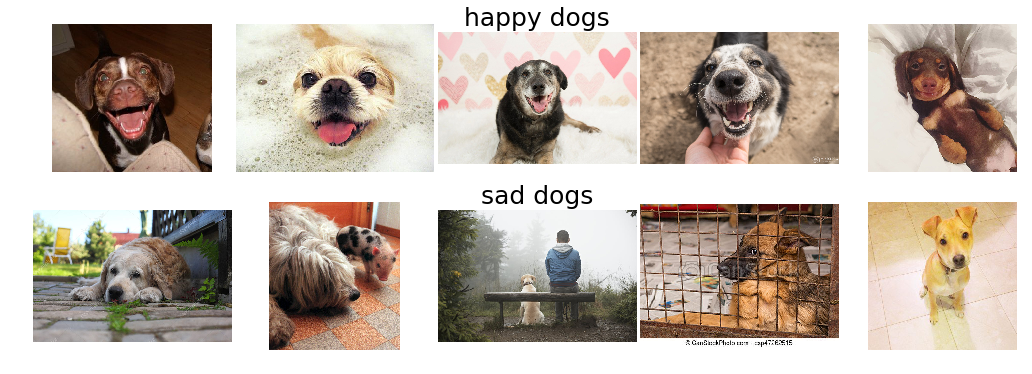

In [148]:
np.random.seed(seed=20)
n_samples = 5
fig, row = plt.subplots(2, n_samples, figsize = (4*n_samples, 3*2))

for col,folder in zip(row,data_folders):
    col[int(np.floor(n_samples/2))].set_title(folder,fontsize=25)
    working_dir = os.path.join(data_path,folder)
    os.chdir(working_dir)
    for col_ax,img in zip(col,np.random.choice(os.listdir(os.getcwd()),n_samples,replace=False)):
        rand_img = cv2.imread(img)
        rand_img = cv2.cvtColor(rand_img,cv2.COLOR_BGR2RGB)
        col_ax.imshow(rand_img)
        col_ax.axis('off')
plt.subplots_adjust(left=0.2, wspace=0.02)
os.chdir(original_path)

## Load and pre-processing

In [149]:
img_rows = 128
img_cols = 128
img_list = []
label_list = []
labels = dict([('sad dogs',0),('happy dogs',1)])
for folder in data_folders:
    working_dir = os.path.join(data_path,folder)
    os.chdir(working_dir)
    current_list = os.listdir(os.getcwd())
    for img in current_list:
        img_in = cv2.imread(img)    
        img_in = cv2.cvtColor(img_in,cv2.COLOR_BGR2RGB)    
        img_in = cv2.resize(img_in,(img_rows,img_cols))
        img_list.append(img_in)
        label_list.append(labels[folder])
os.chdir(original_path)



### normalization

In [150]:
img_data = np.array(img_list).astype('float32')
img_label = np.array(label_list)
img_data /= np.max(img_data)
# img_data = np.expand_dims(img_data,axis=3) # if gray-scale used

In [151]:
print(img_data.shape)
print(img_label.shape)

(1462, 128, 128, 3)
(1462,)


## Splitting

In [152]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
X_shuffled, y_shuffled = shuffle(img_data,img_label,random_state=0)

X_train,X_valid_test,y_train,y_valid_test = train_test_split(X_shuffled,y_shuffled,test_size=0.1,random_state=0,stratify=y_shuffled)
X_valid,X_test,y_valid,y_test = train_test_split(X_valid_test,y_valid_test,test_size=0.5,random_state=0,stratify=y_valid_test)
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_valid shape: {}'.format(X_valid.shape))
print('y_valid shape: {}'.format(y_valid.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (1315, 128, 128, 3)
y_train shape: (1315,)
X_valid shape: (73, 128, 128, 3)
y_valid shape: (73,)
X_test shape: (74, 128, 128, 3)
y_test shape: (74,)


## Model building

### directory to save best models

In [25]:
os.mkdir('best_models')

### import modules and params

In [153]:
from keras.models import Model,Sequential
from keras.layers import Input,Dense,Activation,BatchNormalization,Flatten,Conv2D,MaxPooling2D,GlobalAveragePooling2D,Dropout,Add
from keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
from keras.optimizers import Adam

In [154]:
%load_ext autoreload
%autoreload 2
import helper_module as hm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [155]:
epochs = 350
batch_size = 16
X_input_shape = img_data[0].shape
learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss',patience=10,verbose=1,factor=0.7,min_lr=0.00001)

In [156]:
img_data[0].shape

(128, 128, 3)

### Model #1: arbitrary CNN - initial trial (~ResNet) with Data augmentation
As an initial model, a simple CNN with 2 conv layers and 1 fc layer is built.

In [57]:
def identity_block(n_f,x):
    shortcut = x
    x = Conv2D(n_f,(3,3),strides=(1,1),padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(n_f,(3,3),strides=(1,1),padding='same')(x)
    x = BatchNormalization()(x)
    x = Add()([shortcut,x])
    x = Activation('relu')(x)
    return x

def conv_block(n_f,x):
    x = Conv2D(n_f,(3,3),strides=(2,2),padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    x = Conv2D(n_f,(3,3),strides=(2,2),padding='same',activation='relu')(x)
    x = BatchNormalization()(x)
    return x

In [128]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True,
                             rotation_range=45)
datagen.fit(X_train)

In [133]:
model_name = 'Model_1'
optimizer = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=10**-8)

inputs = Input(shape=img_data[0].shape)

x = Conv2D(32,(3,3),strides=(2,2),padding='same',activation='relu')(inputs)
x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)

for _ in range(3):
    x = identity_block(32,x)
x = conv_block(64,x)
for _ in range(3):
    x = identity_block(64,x)
x = GlobalAveragePooling2D()(x)
outputs = Dense(1,activation='sigmoid')(x)
model_1 = Model(inputs,outputs)

model_1.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
best_model_path = os.path.join('best_models','best-wiehgts-'+model_name+'-{epoch:03d}-{val_loss:.3f}-{val_acc:.3f}.hdf5')
print(model_name)
hm.print_train_num_param(model_1)

Model_1
Trainable params: 334,273


In [134]:
save_best_model = ModelCheckpoint(best_model_path, monitor='val_loss', verbose=0, save_best_only=True, mode='min')
hist_1 = model_1.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),
                                           steps_per_epoch = len(X_train)//batch_size,
                                           epochs=epochs,
                                           verbose=0,
                                           validation_data=(X_valid,y_valid),
                                           callbacks=[save_best_model,learning_rate_reduction])


Epoch 00017: ReduceLROnPlateau reducing learning rate to 0.00035000001662410796.

Epoch 00035: ReduceLROnPlateau reducing learning rate to 0.00024500001163687554.

Epoch 00048: ReduceLROnPlateau reducing learning rate to 0.00017150000203400848.

Epoch 00058: ReduceLROnPlateau reducing learning rate to 0.00012004999734926967.

Epoch 00068: ReduceLROnPlateau reducing learning rate to 8.403499814448878e-05.

Epoch 00078: ReduceLROnPlateau reducing learning rate to 5.882449768250808e-05.

Epoch 00088: ReduceLROnPlateau reducing learning rate to 4.117714888707269e-05.

Epoch 00098: ReduceLROnPlateau reducing learning rate to 2.88240029476583e-05.

Epoch 00108: ReduceLROnPlateau reducing learning rate to 2.0176801808702293e-05.

Epoch 00118: ReduceLROnPlateau reducing learning rate to 1.4123761138762347e-05.

Epoch 00128: ReduceLROnPlateau reducing learning rate to 1e-05.


74/74 [==============================] - 0s 593us/step
Valid: accuracy = 0.726027  ;  loss = 0.628770
Test: accuracy = 0.635135  ;  loss = 0.836038


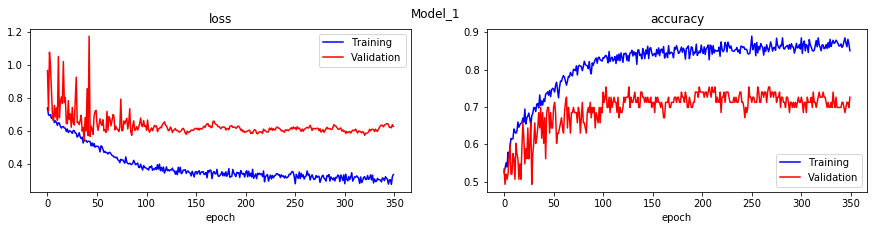

In [135]:
hm.print_valid_test_score(model_1,X_valid,y_valid,X_test,y_test) # with ~res and aug batch 16 gray
hm.training_plot(hist_1,model_name) 

74/74 [==============================] - 0s 620us/step
Valid: accuracy = 0.808219  ;  loss = 0.601413
Test: accuracy = 0.743243  ;  loss = 0.918841


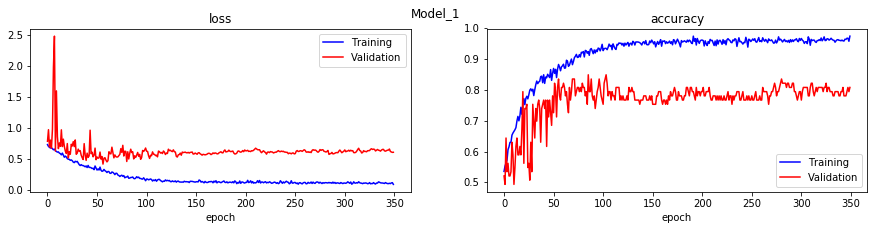

In [45]:
hm.print_valid_test_score(model_1,X_valid,y_valid,X_test,y_test) # with ~res and aug batch 32 color
hm.training_plot(hist_1,model_name) 

In [62]:
# y_pred = model_1.predict_classes(X_test)
# hm.confusion_matrix_plot(y_test,y_pred,model_name)

add dropout --> if still fit add in the loop

In [136]:
model_name = 'Model_2'
optimizer = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=10**-8)

inputs = Input(shape=img_data[0].shape)

x = Conv2D(32,(3,3),strides=(2,2),padding='same',activation='relu')(inputs)
x = MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='same')(x)

for _ in range(3):
    x = identity_block(32,x)
x = Dropout(0.5)(x)
x = conv_block(64,x)
x = Dropout(0.5)(x)
for _ in range(3):
    x = identity_block(64,x)
x = Dropout(0.5)(x)
    
x = GlobalAveragePooling2D()(x)
outputs = Dense(1,activation='sigmoid')(x)
model_2 = Model(inputs,outputs)

model_2.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
best_model_path = os.path.join('best_models','best-wiehgts-'+model_name+'-{epoch:03d}-{val_loss:.3f}-{val_acc:.3f}.hdf5')
print(model_name)
hm.print_train_num_param(model_2)


Model_2
Trainable params: 334,273


In [137]:
save_best_model = ModelCheckpoint(best_model_path, monitor='val_loss', verbose=0, save_best_only=True, mode='min')
hist_2 = model_2.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),
                                           steps_per_epoch = len(X_train)//batch_size,
                                           epochs=epochs,
                                           verbose=0,
                                           validation_data=(X_valid,y_valid),
                                           callbacks=[save_best_model,learning_rate_reduction])


Epoch 00016: ReduceLROnPlateau reducing learning rate to 0.00035000001662410796.

Epoch 00032: ReduceLROnPlateau reducing learning rate to 0.00024500001163687554.

Epoch 00049: ReduceLROnPlateau reducing learning rate to 0.00017150000203400848.

Epoch 00059: ReduceLROnPlateau reducing learning rate to 0.00012004999734926967.

Epoch 00075: ReduceLROnPlateau reducing learning rate to 8.403499814448878e-05.

Epoch 00085: ReduceLROnPlateau reducing learning rate to 5.882449768250808e-05.

Epoch 00095: ReduceLROnPlateau reducing learning rate to 4.117714888707269e-05.

Epoch 00105: ReduceLROnPlateau reducing learning rate to 2.88240029476583e-05.

Epoch 00115: ReduceLROnPlateau reducing learning rate to 2.0176801808702293e-05.

Epoch 00125: ReduceLROnPlateau reducing learning rate to 1.4123761138762347e-05.

Epoch 00135: ReduceLROnPlateau reducing learning rate to 1e-05.


74/74 [==============================] - 0s 526us/step
Valid: accuracy = 0.657534  ;  loss = 0.712905
Test: accuracy = 0.662162  ;  loss = 0.739659


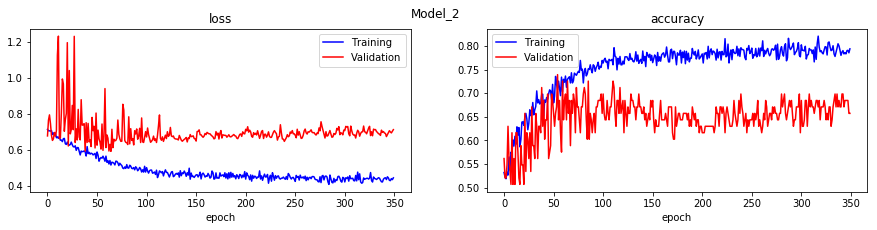

In [138]:
hm.print_valid_test_score(model_2,X_valid,y_valid,X_test,y_test) # with ~res and aug and light dropout batch 16 gray
hm.training_plot(hist_2,model_name) 

74/74 [==============================] - 0s 404us/step
Valid: accuracy = 0.835616  ;  loss = 0.593034
Test: accuracy = 0.756757  ;  loss = 0.951935


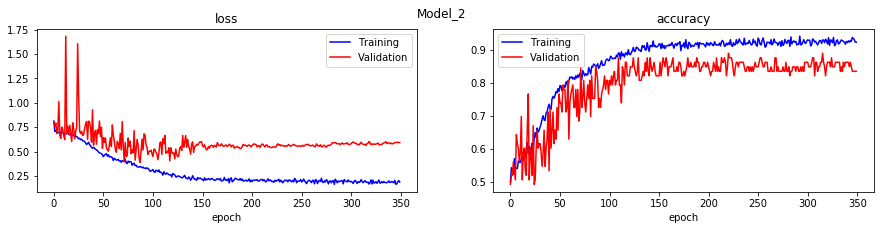

In [51]:
hm.print_valid_test_score(model_2,X_valid,y_valid,X_test,y_test) # with ~res and aug and light dropout batch 16 color
hm.training_plot(hist_2,model_name) 

74/74 [==============================] - 0s 418us/step
Valid: accuracy = 0.794521  ;  loss = 0.672501
Test: accuracy = 0.675676  ;  loss = 1.041496


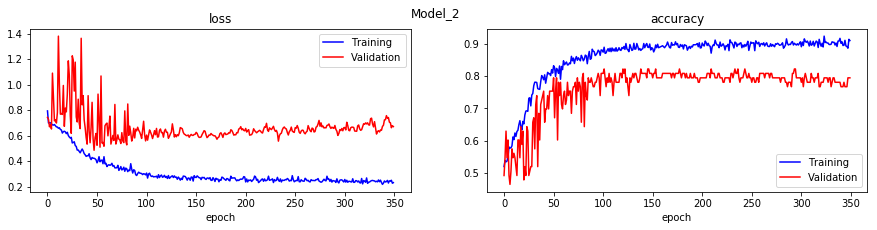

In [48]:
hm.print_valid_test_score(model_2,X_valid,y_valid,X_test,y_test) # with ~res and aug and light dropout batch 32 color
hm.training_plot(hist_2,model_name) 

## add transfer learning resnet

In [163]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50,preprocess_input
from keras.applications.vgg16 import VGG16
datagen = ImageDataGenerator(width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True,
                             rotation_range=45,)
                             #preprocessing_function=preprocess_input)
                             
datagen.fit(X_train)

model_name = 'Model_3'
optimizer = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=10**-8)
model_3_bottom = ResNet50(include_top=False, weights='imagenet')#,input_tensor=inputs)
last_layer = model_3_bottom.output
x = GlobalAveragePooling2D()(last_layer)
x = Dense(128)(x)
x = BatchNormalization()(x)
x = Activation('relu')(x)
x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)
model_3 = Model(model_3_bottom.input,outputs)

C:\Users\sungsooc\AppData\Local\Continuum\anaconda3\envs\workspace-gpu\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [160]:
print(model_name+' before freezing')
hm.print_train_num_param(model_3)

for layer in model_3.layers[:175]:
    layer.trainable=False
print(model_name+' after freezing')
hm.print_train_num_param(model_3)

Model_3 before freezing
Trainable params: 23,797,249
Model_3 after freezing
Trainable params: 262,657


In [165]:
model_3.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
best_model_path = os.path.join('best_models','best-wiehgts-'+model_name+'-{epoch:03d}-{val_loss:.3f}-{val_acc:.3f}.hdf5')
save_best_model = ModelCheckpoint(best_model_path, monitor='val_loss', verbose=0, save_best_only=True, mode='min')
hist_3 = model_3.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),
                                           steps_per_epoch = len(X_train)/batch_size,
                                           epochs=epochs,
                                           verbose=1,
                                           validation_data=(X_valid,y_valid),
                                           callbacks=[save_best_model,learning_rate_reduction])

Epoch 1/350
83/82 [==============================] - 40s 488ms/step - loss: 0.6658 - acc: 0.6890 - val_loss: 3.2503 - val_acc: 0.5479
Epoch 2/350
83/82 [==============================] - 14s 173ms/step - loss: 0.5599 - acc: 0.7349 - val_loss: 0.6256 - val_acc: 0.7260
Epoch 3/350
83/82 [==============================] - 14s 173ms/step - loss: 0.4860 - acc: 0.7816 - val_loss: 0.5310 - val_acc: 0.7808
Epoch 4/350
83/82 [==============================] - 14s 173ms/step - loss: 0.5070 - acc: 0.7806 - val_loss: 0.5540 - val_acc: 0.7397
Epoch 5/350
83/82 [==============================] - 14s 173ms/step - loss: 0.4357 - acc: 0.8045 - val_loss: 0.5805 - val_acc: 0.6986
Epoch 6/350
83/82 [==============================] - 14s 174ms/step - loss: 0.4792 - acc: 0.7882 - val_loss: 0.8546 - val_acc: 0.7945
Epoch 7/350
83/82 [==============================] - 14s 173ms/step - loss: 0.3916 - acc: 0.8366 - val_loss: 0.4265 - val_acc: 0.7945
Epoch 8/350
83/82 [==============================] - 14s 173ms

83/82 [==============================] - 14s 172ms/step - loss: 0.0951 - acc: 0.9697 - val_loss: 0.5953 - val_acc: 0.8219
Epoch 60/350
83/82 [==============================] - 14s 172ms/step - loss: 0.0593 - acc: 0.9789 - val_loss: 0.6445 - val_acc: 0.7945
Epoch 61/350
83/82 [==============================] - 14s 172ms/step - loss: 0.0517 - acc: 0.9842 - val_loss: 0.5488 - val_acc: 0.8356
Epoch 62/350
83/82 [==============================] - 14s 172ms/step - loss: 0.0623 - acc: 0.9819 - val_loss: 0.5976 - val_acc: 0.8219
Epoch 63/350
83/82 [==============================] - 14s 172ms/step - loss: 0.0732 - acc: 0.9782 - val_loss: 0.8795 - val_acc: 0.8219
Epoch 64/350
83/82 [==============================] - 14s 172ms/step - loss: 0.0828 - acc: 0.9736 - val_loss: 0.7755 - val_acc: 0.8082

Epoch 00064: ReduceLROnPlateau reducing learning rate to 8.403499814448878e-05.
Epoch 65/350
83/82 [==============================] - 14s 172ms/step - loss: 0.1036 - acc: 0.9802 - val_loss: 0.6186 - val

83/82 [==============================] - 14s 172ms/step - loss: 0.0163 - acc: 0.9970 - val_loss: 0.6478 - val_acc: 0.8082
Epoch 117/350
83/82 [==============================] - 14s 174ms/step - loss: 0.0138 - acc: 0.9970 - val_loss: 0.6781 - val_acc: 0.8082
Epoch 118/350
83/82 [==============================] - 14s 172ms/step - loss: 0.0382 - acc: 0.9915 - val_loss: 0.6623 - val_acc: 0.8082
Epoch 119/350
83/82 [==============================] - 14s 172ms/step - loss: 0.0163 - acc: 0.9947 - val_loss: 0.6370 - val_acc: 0.8219
Epoch 120/350
83/82 [==============================] - 14s 172ms/step - loss: 0.0619 - acc: 0.9868 - val_loss: 0.6188 - val_acc: 0.8356
Epoch 121/350
83/82 [==============================] - 14s 172ms/step - loss: 0.0119 - acc: 0.9977 - val_loss: 0.6224 - val_acc: 0.8219
Epoch 122/350
83/82 [==============================] - 14s 172ms/step - loss: 0.0128 - acc: 0.9962 - val_loss: 0.6432 - val_acc: 0.8219
Epoch 123/350
83/82 [==============================] - 14s 172

Epoch 176/350
83/82 [==============================] - 14s 174ms/step - loss: 0.0533 - acc: 0.9883 - val_loss: 0.6435 - val_acc: 0.8356
Epoch 177/350
83/82 [==============================] - 14s 174ms/step - loss: 0.0327 - acc: 0.9900 - val_loss: 0.6640 - val_acc: 0.8630
Epoch 178/350
83/82 [==============================] - 14s 173ms/step - loss: 0.0177 - acc: 0.9962 - val_loss: 0.6745 - val_acc: 0.8356
Epoch 179/350
83/82 [==============================] - 14s 173ms/step - loss: 0.0332 - acc: 0.9930 - val_loss: 0.6838 - val_acc: 0.8356
Epoch 180/350
83/82 [==============================] - 14s 174ms/step - loss: 0.0284 - acc: 0.9938 - val_loss: 0.6820 - val_acc: 0.8356
Epoch 181/350
83/82 [==============================] - 14s 172ms/step - loss: 0.0365 - acc: 0.9938 - val_loss: 0.6756 - val_acc: 0.8493
Epoch 182/350
83/82 [==============================] - 14s 171ms/step - loss: 0.0171 - acc: 0.9970 - val_loss: 0.6579 - val_acc: 0.8493
Epoch 183/350
83/82 [===========================

83/82 [==============================] - 14s 172ms/step - loss: 0.0128 - acc: 0.9970 - val_loss: 0.7129 - val_acc: 0.8219
Epoch 237/350
83/82 [==============================] - 14s 171ms/step - loss: 0.0162 - acc: 0.9962 - val_loss: 0.6612 - val_acc: 0.8356
Epoch 238/350
83/82 [==============================] - 14s 170ms/step - loss: 0.0101 - acc: 0.9985 - val_loss: 0.6510 - val_acc: 0.8493
Epoch 239/350
83/82 [==============================] - 14s 171ms/step - loss: 0.0080 - acc: 0.9985 - val_loss: 0.6613 - val_acc: 0.8356
Epoch 240/350
83/82 [==============================] - 14s 171ms/step - loss: 0.0091 - acc: 1.0000 - val_loss: 0.6505 - val_acc: 0.8219
Epoch 241/350
83/82 [==============================] - 14s 170ms/step - loss: 0.0555 - acc: 0.9898 - val_loss: 0.6558 - val_acc: 0.8630
Epoch 242/350
83/82 [==============================] - 14s 171ms/step - loss: 0.0104 - acc: 0.9985 - val_loss: 0.6637 - val_acc: 0.8493
Epoch 243/350
83/82 [==============================] - 14s 171

83/82 [==============================] - 15s 175ms/step - loss: 0.0481 - acc: 0.9883 - val_loss: 0.7730 - val_acc: 0.8219
Epoch 297/350
83/82 [==============================] - 14s 175ms/step - loss: 0.0618 - acc: 0.9923 - val_loss: 0.7793 - val_acc: 0.7945
Epoch 298/350
83/82 [==============================] - 15s 176ms/step - loss: 0.0449 - acc: 0.9915 - val_loss: 0.7988 - val_acc: 0.7945
Epoch 299/350
83/82 [==============================] - 14s 174ms/step - loss: 0.0605 - acc: 0.9883 - val_loss: 0.7952 - val_acc: 0.7945
Epoch 300/350
83/82 [==============================] - 14s 172ms/step - loss: 0.0499 - acc: 0.9875 - val_loss: 0.7950 - val_acc: 0.7945
Epoch 301/350
83/82 [==============================] - 14s 172ms/step - loss: 0.0138 - acc: 0.9962 - val_loss: 0.7862 - val_acc: 0.7945
Epoch 302/350
83/82 [==============================] - 14s 171ms/step - loss: 0.0119 - acc: 0.9970 - val_loss: 0.7751 - val_acc: 0.7945
Epoch 303/350
83/82 [==============================] - 14s 171

74/74 [==============================] - 0s 6ms/step
Valid: accuracy = 0.808219  ;  loss = 0.856217
Test: accuracy = 0.702703  ;  loss = 1.335880


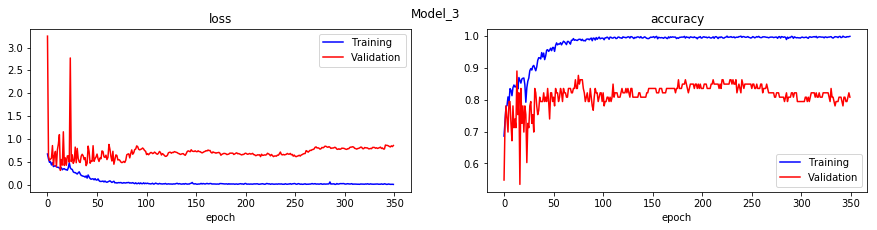

In [166]:
hm.print_valid_test_score(model_3,X_valid,y_valid,X_test,y_test) # all trainable
hm.training_plot(hist_3,model_name) 

110/110 [==============================] - 1s 8ms/step
Valid: accuracy = 0.678899  ;  loss = 0.653643
Test: accuracy = 0.690909  ;  loss = 0.758061


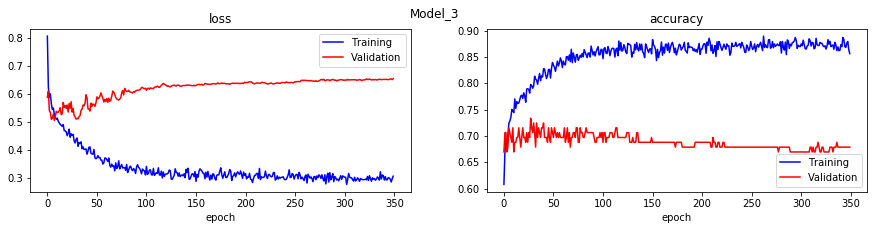

In [57]:
hm.print_valid_test_score(model_3,X_valid,y_valid,X_test,y_test)
hm.training_plot(hist_3,model_name) 

In [43]:
# y_pred = model_3.predict_classes(X_test)
# hm.confusion_matrix_plot(y_test,y_pred,model_name)

check output shape of resnet50 top

In [167]:
img_rows = 128
img_cols = 128
img_list = []
label_list = []
labels = dict([('sad dogs',0),('happy dogs',1)])
for folder in data_folders:
    working_dir = os.path.join(data_path,folder)
    os.chdir(working_dir)
    current_list = os.listdir(os.getcwd())
    for img in current_list:
        img_in = cv2.imread(img)    
        img_in = cv2.cvtColor(img_in,cv2.COLOR_BGR2RGB)    
        img_in = cv2.resize(img_in,(img_rows,img_cols))
        img_list.append(img_in)
        label_list.append(labels[folder])
os.chdir(original_path)

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
X_shuffled, y_shuffled = shuffle(img_data,img_label,random_state=0)

X_train,X_valid_test,y_train,y_valid_test = train_test_split(X_shuffled,y_shuffled,test_size=0.1,random_state=0,stratify=y_shuffled)
X_valid,X_test,y_valid,y_test = train_test_split(X_valid_test,y_valid_test,test_size=0.5,random_state=0,stratify=y_valid_test)
print('X_train shape: {}'.format(X_train.shape))
print('y_train shape: {}'.format(y_train.shape))
print('X_valid shape: {}'.format(X_valid.shape))
print('y_valid shape: {}'.format(y_valid.shape))
print('X_test shape: {}'.format(X_test.shape))
print('y_test shape: {}'.format(y_test.shape))

X_train shape: (1315, 128, 128, 3)
y_train shape: (1315,)
X_valid shape: (73, 128, 128, 3)
y_valid shape: (73,)
X_test shape: (74, 128, 128, 3)
y_test shape: (74,)


In [174]:
inputs = Input(shape=img_data[0].shape)

In [175]:
inputs

<tf.Tensor 'input_18:0' shape=(?, 128, 128, 3) dtype=float32>

In [189]:
from tensorflow.python.keras import backend as K
from tensorflow.python.keras import layers as kl

class BatchNormalization(kl.BatchNormalization):
    def call(self, inputs, training=None):
        true_phase = int(K.get_session().run(K.learning_phase()))
        trainable = int(self.trainable)
        with K.learning_phase_scope(trainable * true_phase):
            ret = super(BatchNormalization, self).call(inputs, training)
        return ret

In [190]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import ResNet50,preprocess_input
from keras.applications.vgg16 import VGG16
datagen = ImageDataGenerator(width_shift_range=0.2,
                             height_shift_range=0.2,
                             horizontal_flip=True,
                             rotation_range=45,
                             preprocessing_function=preprocess_input)
                             
datagen.fit(X_train)

model_name = 'Model_4'
optimizer = Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=10**-8)
model_4_bottom = ResNet50(include_top=False, weights='imagenet',input_tensor=inputs)
last_layer = model_4_bottom.output
x = GlobalAveragePooling2D()(last_layer) #175th layer
# x = Dense(128)(x)
# x = BatchNormalization()(x)
# x = Activation('relu')(x)
# x = Dropout(0.5)(x)
outputs = Dense(1, activation='sigmoid')(x)
model_4 = Model(inputs,outputs)

for layer in model_4.layers[:175]:
    layer.trainable=False

C:\Users\sungsooc\AppData\Local\Continuum\anaconda3\envs\workspace-gpu\lib\site-packages\keras_applications\resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [ ]:
model_4.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])
best_model_path = os.path.join('best_models','best-wiehgts-'+model_name+'-{epoch:03d}-{val_loss:.3f}-{val_acc:.3f}.hdf5')
save_best_model = ModelCheckpoint(best_model_path, monitor='val_loss', verbose=0, save_best_only=True, mode='min')
hist_4 = model_4.fit_generator(datagen.flow(X_train,y_train,batch_size=batch_size),
                                           steps_per_epoch = len(X_train)/batch_size,
                                           epochs=epochs,
                                           verbose=1,
                                           validation_data=(X_valid,y_valid),
                                           callbacks=[save_best_model,learning_rate_reduction])

Epoch 1/350
83/82 [==============================] - 29s 355ms/step - loss: 0.6711 - acc: 0.5989 - val_loss: 0.8676 - val_acc: 0.4932


In [ ]:
hm.print_valid_test_score(model_4,X_valid,y_valid,X_test,y_test) # not all trainable
hm.training_plot(hist_4,model_name) 

## Testing new image of Lucky!

In [1]:
from keras.models import load_model

Using TensorFlow backend.


In [18]:
chosen_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 128, 128, 3)  0                                            
__________________________________________________________________________________________________
conv2d_136 (Conv2D)             (None, 64, 64, 32)   896         input_10[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_12 (MaxPooling2D) (None, 32, 32, 32)   0           conv2d_136[0][0]                 
__________________________________________________________________________________________________
conv2d_137 (Conv2D)             (None, 32, 32, 32)   9248        max_pooling2d_12[0][0]           
__________________________________________________________________________________________________
batch_norm

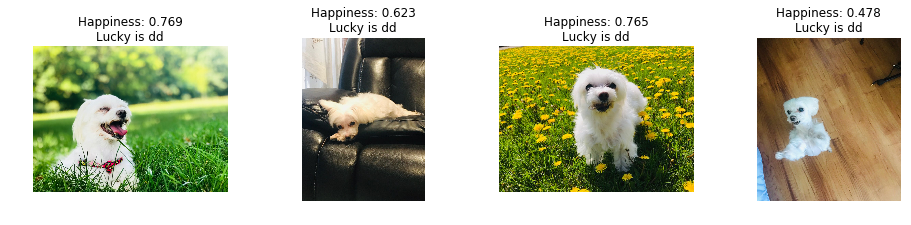

In [22]:
chosen_model = load_model(os.path.join('best_models','best-wiehgts-Model_2-066-0.577-0.743.hdf5'))
fig, axes = plt.subplots(1, 4, figsize = (4*4, 3*1))
for ax,img_num in zip(axes,range(1,5)):
    img = cv2.imread(os.path.join('test_images','Lucky_'+str(img_num)+'.jpg'))
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax.imshow(img)
    
    img = cv2.resize(img,(img_rows,img_cols)).astype('float32')
    img /= 255
    img = np.expand_dims(img,axis=0)
    ax.axis('off')
    predict_rate = chosen_model.predict(img)[0][0]
    predict_class = 'dd'#chosen_model.predict_classes(img)[0][0]
    ax.set_title('Happiness: {:.3f}\nLucky is {}'.format(predict_rate,'dd'))
                                                #list(labels.keys())[list(labels.values()).index(predict_class)].split()[0]))


## To do..
* show mislabeled examples
* make the notebook using image generator
* articles about using flow and flow_from_directory